# LABORATORIO 1 - Práctica 3: Preparación y visualización de Datos
---
<img src="ufv.png" width="100px" height="100px"></img> 
### Integrantes: 
* Julián Prieto Velasco   
* Guillermo Ramírez Cárdenas
* Pedro Paniagua Falo     
* Javier Muñoz Rojas

---

## **Índice**
1. [Introducción](#id0)
1. [Ejercicio 1](#id1)
1. [Ejercicio 2](#id2)
1. [Ejercicio 3](#id3)
1. [Ejercicio 4](#id4)

<div id='id0'/>

## *Introducción*

---
En esta parte realizamos un análisis de componentes, ya que hay ciertos casos en los que  las  variables  no  se  pueden  representar  visualmente  debido  a  que  necesitaríamos  varias dimensiones  para ello. Utilizaremos esta metodología para a partir de un set multidimensional podemos  transformarlo  para  poder  explicar  gran  parte  de  la  información  en  2  o  3  dimensiones.


### Librerias

In [1]:
#importación de librerias
import csv
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


### Lectura del CSV

In [2]:
#lectura del CSV
Pokemon_Dataset = pd.read_csv('pokemon.csv')
#dataset
Pokemon_Dataset.head(10)

,Pokémon,Tipo,PS,Ataque,Defensa,Ataque especial,Defensa especial,Velocidad
0,TYPHLOSION,Fuego,2,3,2,4,2,4
1,PONYTA,Fuego,2,3,2,2,2,3
2,TORKOAL,Fuego,2,3,4,3,2,1
3,ARCANINE,Fuego,3,5,3,4,3,4
4,STARMIE,Agua,2,3,3,4,2,4
5,PALKIA,Agua,3,4,3,5,3,4
6,MILOTIC,Agua,3,2,2,4,3,3
7,AZUMARILL,Agua,3,2,2,2,2,2
8,LEAFEON,Planta,2,4,4,2,2,3
9,ABOMASNOW,Planta,3,3,2,3,2,2


<div id='id1'>

### *Ejercicio 1*

---
Primero estandarizaremos los datos como nos pide el enunciado, para que las diferencias de rango no supongan un problema a la hora de procesar la información.

#### Estandarizado de datos

In [3]:
# Seleccionar solo las columnas que quieres estandarizar
Pokemon_estand = Pokemon_Dataset[['PS', 'Ataque', 'Defensa', 'Ataque especial', 'Defensa especial', 'Velocidad']]

# Instanciar un objeto StandardScaler
scaler = StandardScaler()

# Ajustar el objeto StandardScaler a los datos seleccionados
scaler.fit(Pokemon_estand)

# Transformar los datos seleccionados con el objeto StandardScaler
Pokemon_Dataset_Final = scaler.transform(Pokemon_estand)

# Convertir la matriz resultante en un DataFrame
Pokemon_Dataset_Final1 = pd.DataFrame(Pokemon_Dataset_Final, columns=Pokemon_estand.columns)
print(Pokemon_Dataset_Final)

[[-0.32616404  0.05431254 -0.75        0.56415195 -0.5         1.03797547]
 [-0.32616404  0.05431254 -0.75       -1.1717002  -0.5         0.1353881 ]
 [-0.32616404  0.05431254  1.75       -0.30377413 -0.5        -1.66978662]
 [ 0.97849211  2.22681433  0.5         0.56415195  0.75        1.03797547]
 [-0.32616404  0.05431254  0.5         0.56415195 -0.5         1.03797547]
 [ 0.97849211  1.14056344  0.5         1.43207802  0.75        1.03797547]
 [ 0.97849211 -1.03193835 -0.75        0.56415195  0.75        0.1353881 ]
 [ 0.97849211 -1.03193835 -0.75       -1.1717002  -0.5        -0.76719926]
 [-0.32616404  1.14056344  1.75       -1.1717002  -0.5         0.1353881 ]
 [ 0.97849211  0.05431254 -0.75       -0.30377413 -0.5        -0.76719926]
 [-1.63082018 -2.11818924 -0.75       -1.1717002  -1.75       -1.66978662]
 [-0.32616404  1.14056344 -0.75       -1.1717002  -0.5         0.1353881 ]
 [-0.32616404 -1.03193835 -0.75        0.56415195  0.75        1.94056283]
 [-0.32616404  0.05431254

<div id='id2'>

### *Ejercicio 2*

---

A partir de los datos del ejercicio anterior, crearemos la matriz de covarianza mediante el método "cov", dónde se utiliza la matriz traspuesta para poder obtener después los correctos autovalores y los autovectores.
### Cálculo la matriz de covarianza para obtener los autovalores y autovectores

In [4]:
# Calcular la matriz de covarianza
matriz_covarianza = np.cov(Pokemon_Dataset_Final.T)

# Calcular los autovalores y autovectores de la matriz de covarianza
autovalores, autovectores = np.linalg.eig(matriz_covarianza)

### Dataframe con porcentaje de varianza y el acumulado por cada componente.

   Variance Explained  Cumulative Variance
0           41.641341            41.641341
1           24.552140            66.193481
2           12.363041            78.556522
3           11.329090            89.885612
4            7.514464            97.400076
5            2.599924           100.000000


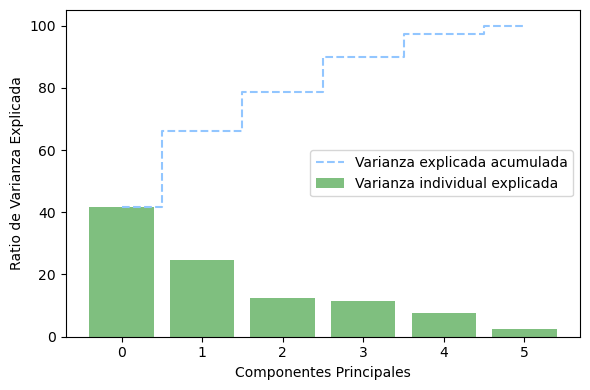

In [5]:
Pokemon_Covar = np.cov(Pokemon_Dataset_Final1.T)

# Calcular los autovalores y autovectores de la matriz de covarianza
autovalores, autovectores = np.linalg.eig(Pokemon_Covar)

# Calcular el total de varianza
varianza_total = np.sum(autovalores)
# Calcular el porcentaje de varianza explicado por cada componente
varianza = [(i / varianza_total)*100 for i in sorted(autovalores, reverse=True)]
# Calcular el acumulado de varianza explicado
Varianza_Acumulada = np.cumsum(varianza)

# Crear un DataFrame con el porcentaje de varianza y el acumulado
Dataset_Final = pd.DataFrame({'Variance Explained': varianza,
                              'Cumulative Variance': Varianza_Acumulada})

print(Dataset_Final)

# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
# El objetivo es saber cuál es el menor número de autovectores o componentes principales, 
# con el que podemos expresar “la esencia principal” de la información contenida en ese dataset. 
# Para ello, usaremos un métrica que se conoce como “varianza explicada”, 
# que muestra cuánta varianza se puede atribuir a cada una de estas componentes principales.
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(6), varianza, alpha=0.5, align='center',
            label='Varianza individual explicada', color='g')
    plt.step(range(6), Varianza_Acumulada, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()
plt.show()

Este Data Frame explica lo mismo que se presenta en la gráfica: cuál es el número menor de componentes principales, con el que podemos representar la mayoría de la información, reduciendo así la dimensionalidad. Como podemos ver gracias a la varianza acumulada, con dos componentes podemos representar más de la mitad de la información original:


* Con dos componentes perdemos el 33% de los datos.
* Con tres componentes representa el 78.56% de los datos.

<div id='id3'>

### *Ejercicio 3*

---
Representación gráfica de los individuos del dataset. 

Autovalores en orden descendiente:
2.629979441140372
1.5506614706148552
0.7808236593436158
0.7155214470319361
0.4745977383380431
0.1642057172153873
Matriz W:
 [[ 0.45454125  0.15847313]
 [ 0.45072878 -0.25198079]
 [ 0.31882326 -0.63200759]
 [ 0.42331653  0.38227978]
 [ 0.48098891 -0.16852151]
 [ 0.27935701  0.58087953]]


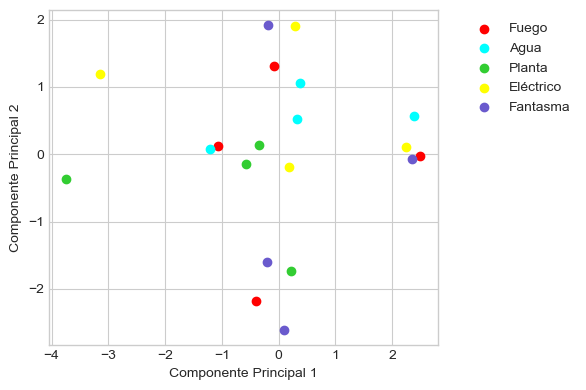

In [6]:
# Creación del diagrama de dispersión
'''
plt.scatter(Dataset_Final['Variance Explained'], Dataset_Final['Cumulative Variance'])

plt.xlabel('Variance Explained')
plt.ylabel('Cumulative Variance')
plt.title('Diagrama de dispersión en 2 dimensiones')
plt.grid()
plt.show()
'''
#Cogemos la columna de tipos que utilizamos para mostrarlo en la gráfica
columna_tipo = Pokemon_Dataset.iloc[:,1].values
#  Hacemos una lista de parejas (autovector, autovalor) 
eig_pairs = [(np.abs(autovalores[i]), autovectores[:,i]) for i in range(len(autovalores))]

# Ordenamos estas parejas den orden descendiente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)

#Visualizamos la lista de autovalores en orden desdenciente
print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])


#Generamos la matríz a partir de los pares autovalor-autovector
matrix_w = np.hstack((eig_pairs[0][1].reshape(6,1),
                      eig_pairs[1][1].reshape(6,1)))
print('Matriz W:\n', matrix_w)

Y = Pokemon_Dataset_Final.dot(matrix_w)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Fuego', 'Agua', 'Planta', 'Eléctrico', 'Fantasma'),
                        ('red', 'cyan', 'limegreen', 'yellow', 'slateblue')):
        plt.scatter(Y[columna_tipo==lab, 0],
                    Y[columna_tipo==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    


Elegimos los cuatro datos que se encuentran más a la derecha, de estos datos podemos decir que:

* Al estar relativamente juntos, estos individuos tienen una fuerte correlación
* 